In [153]:
import xarray as xr
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colorbar import ColorbarBase

# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D_mean'
zoom = 'z5'

# constants
S_PER_DAY = 86400

# define the fname
fpath = f'{datapath}/{file}_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

#### some variables of interest ####

**hfssd**: sensible heat flux  
**hflsd**: latent heat flux  
**huss**: specific humidity in 2m  
**mrso**: Water content of soil layers  
**orog**: surface altitude  
**pr**: precipitation flux  
**rlds**: surface downwelling longwave radiation  
**rldscs**: surface downwelling clear-sky longwave radiation  
**rlus**: surface upwelling longwave radiation  
**rsds**: surface downwelling shortwave radiation  
**rsdscs**: surface downwelling clear-sky shortwave radiation  
**rsus**: surface upwelling shortwave radiation  
**sftlf**: cell area fraction occupied by land including lakes  
**tas**: temperature in 2m  
**tauu**: u-momentum flux at the surface  
**tauv**: v-momentum flux at the surface  
**ts**: surface temperature  
**uas**: zonal wind in 10m  
**vas**: meridional wind in 10m  

In [154]:
# get cell area fraction of land
land_frac = ds['sftlf']

# convert precip from mm/s to mm/day
precip_year_mean = ds['pr'].mean('time')*S_PER_DAY


In [159]:
def plot_three_panels(soil_moisture, precip, latent_heat, figtitle):
    plt.close('all')
    projection=ccrs.PlateCarree(central_longitude=0.0)
    fig, axes = plt.subplots(3, 1, figsize=(6, 12), subplot_kw={'projection': projection})

    titles = ['soil moisture', 'precipitation', 'latent heat']
    cmaps = ['Blues','Blues','Blues_r']
    vmaxs = [0.03,10,0]

    for ax, data, title, cmap, vmax in zip(axes.flatten(), [soil_moisture, precip, latent_heat], 
                            titles,cmaps,vmaxs):
        
        ax.set_global()
        im = egh.healpix_show(data.values,ax=ax,cmap=cmap,vmax=vmax)
        ax.set_title(title)
        ax.coastlines()
        # ax.gridlines(draw_labels=True)

        # colorbar
        cax = inset_axes(ax,
        width='4%',  # % of parent_bbox width
        height='100%',
        loc='lower left',
        bbox_to_anchor=(1.05, 0, 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0,
        )
        cbar = ColorbarBase(cax, cmap=im.cmap, norm = im.norm, ticks = None)

    fig.subplots_adjust(hspace=-0.25)
    fig.suptitle(figtitle,y=0.88, fontsize=14)
    plt.show()

    return

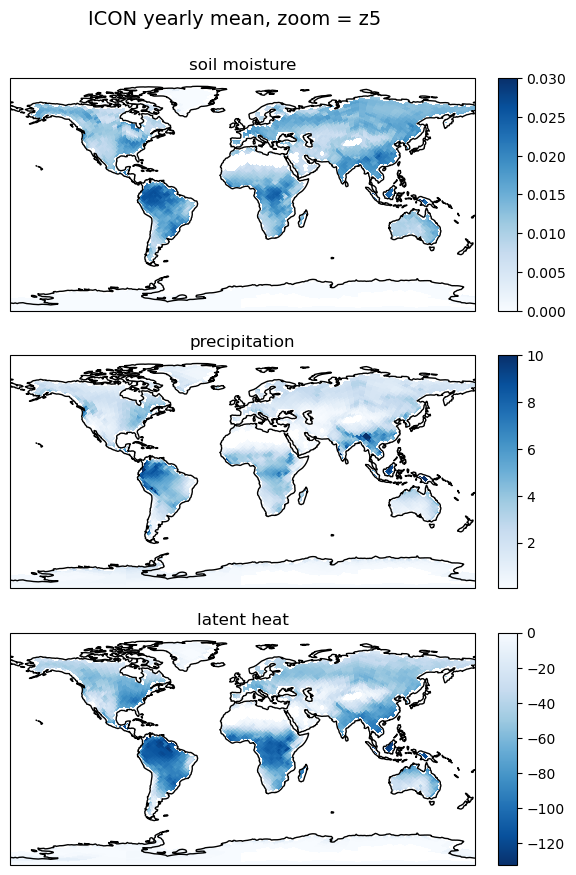

In [160]:
# get variables to plot
dates = slice('2020-03','2021-02')
sm_mean = ds['mrso'].sel(time=dates).isel(soil_level=0).mean('time')
pr_mean = ds['pr'].sel(time=dates).mean('time')*S_PER_DAY
lh_mean = ds['hflsd'].sel(time=dates).mean('time')

# apply mask
sm_mean = sm_mean.where(land_frac>0.9).where(precip_year_mean>0.1)
pr_mean = pr_mean.where(land_frac>0.9).where(precip_year_mean>0.1)
lh_mean = lh_mean.where(land_frac>0.9).where(precip_year_mean>0.1)

figtitle = f'ICON yearly mean, zoom = {zoom}'

# plot_three_panels(soil_moisture, precip, latent_heat, figtitle)
plot_three_panels(sm_mean, pr_mean, lh_mean, figtitle)

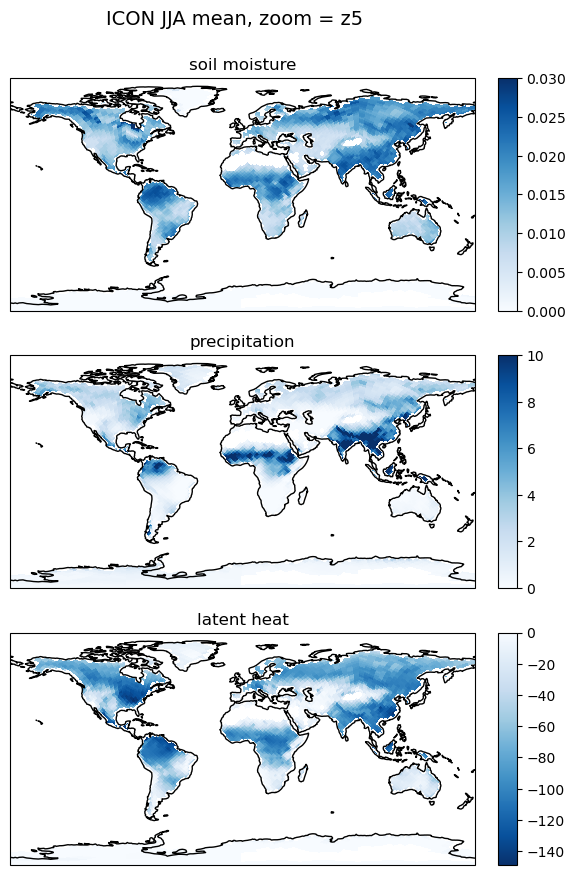

In [161]:
# get variables to plot
dates = slice('2020-06','2020-09')
sm_mean = ds['mrso'].sel(time=dates).isel(soil_level=0).mean('time')
pr_mean = ds['pr'].sel(time=dates).mean('time')*S_PER_DAY
lh_mean = ds['hflsd'].sel(time=dates).mean('time')

# apply mask
sm_mean = sm_mean.where(land_frac>0.9).where(precip_year_mean>0.1)
pr_mean = pr_mean.where(land_frac>0.9).where(precip_year_mean>0.1)
lh_mean = lh_mean.where(land_frac>0.9).where(precip_year_mean>0.1)

figtitle = f'ICON JJA mean, zoom = {zoom}'

plot_three_panels(sm_mean, pr_mean, lh_mean, figtitle)